# Monte-Carlo Simulation

## Aufgabenstellung

Wir betrachten weiter den Federspeicher aus Assignment 1. Diesmal simulieren wir die Ergebnisse der Fertigung für $N=10.000$ Zylinder. In diesem Assignment kommt die Federrate dazu. Das Federpaket besteht aus 24 Einzelfedern, die ineinander gesteckt auf dem Umfang des Zylinder verteilt sind. Die Toleranzen der Federn sind recht groß. Die Federn sind nominal

- $c_1 = (100 \pm 20)\, \mathrm{N/mm}$ 
- $c_2 = (150 \pm 30)\, \mathrm{N/mm}$ 
- $c_3 = (200 \pm 40)\, \mathrm{N/mm}$ 

Die Gesamtfederrate ergibt sich als

$$
c = \sum_{i=1}^{3} \sum_{j=1}^{8} c_{i,j}
$$

Die geometrischen Eigenschaften entspricht dem ersten Assignment:

 - Deviation $d$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{1}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Deviation $h_{2}$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$
 - Dev. $l$/mm: Gleichverteilt, $[-0.05, 0.05]\,\mathrm{mm}$

Mit diesen Abweichungen vom Mittelwert ergibt sich die Kraft des Federspeichers als

$$
F = 2 i c(1 + h_1 + h_2 + l + d)
$$

mit der Übersetzungsrate des Zylinders $i = 2.6$.

Fragestellungen:

1. Federpaket:
   - a. Wie verhält sich das Federpaket im nominalen Zustand? Simuliert dazu mindestens $N=10^4$ stochastisch unabhängige Einzelfedern und bestimmt die Federrate von aus diesen Federn zusammengesetzten Federpaketen.
   - b. Die Federn $c_3$ liegen innerhalb der Toleranzen mit $c_3 < 200 \, \mathrm{N/mm}$. Wie ändert sich die Federrate?
2. Federspeicherzylinder: Welche Verteilungen ergeben sich für die Federspeicherzylinder mit Federpakete nach a. bzw. b.? Wie entwickelt sich der Anteil der konformen Einheiten ($F_{min} = 18 \,\mathrm{kN}$)?

Beantwortet die Fragestellungen in einem technischen Bericht mit Einleitung, Analyse und Beantwortung der Fragen.

____________________________________________________________________________________________________________________________________________________________________________________________________________
# Einleitung

In der nachfolgenden Analyse wird eine Fertigung von 10.000 Federn simuliert um zu beurteilen, wie sich die Varianz durch die möglichen Toleranzen auf die zusammengebauten Federpakete verhält. Die Simulation erfolgt durch die Benutzung von der random funktion aus Numpy, die mögliche Federkonstanten innerhalb der Toleranzen abbildet.

# Analyse:

Für die Betrachtung des nominellen Zustandes (Aufgabe a) wird untersucht, wie sich bei Einhaltung der Toleranzwerte eine statistische Verteilung für die Gesamtfederrate, bei 10.000 verschiedenen Federn mit zufälligen Federsteifigkeiten (innerhalb der Toleranz). Für weitere Untersuchung mit dem in Aufgabe b geforderten Toleranzbereich für c3 < 200 N/mm wird für c3 die Variable c3_b eingeführt. Abschließend liefert die Ausgabe zwei Diagramme, die das Histogramm für die Entsprechenden Toleranzbereiche darstellt.

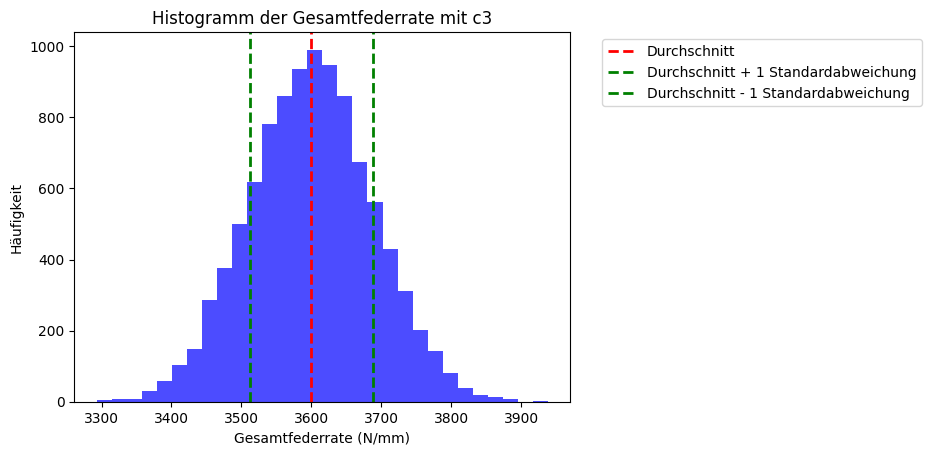

Durchschnittliche Federrate: 3599.62 N/mm
Varianz: 7732.46 (N/mm)²
Standardabweichung: 87.93 N/mm


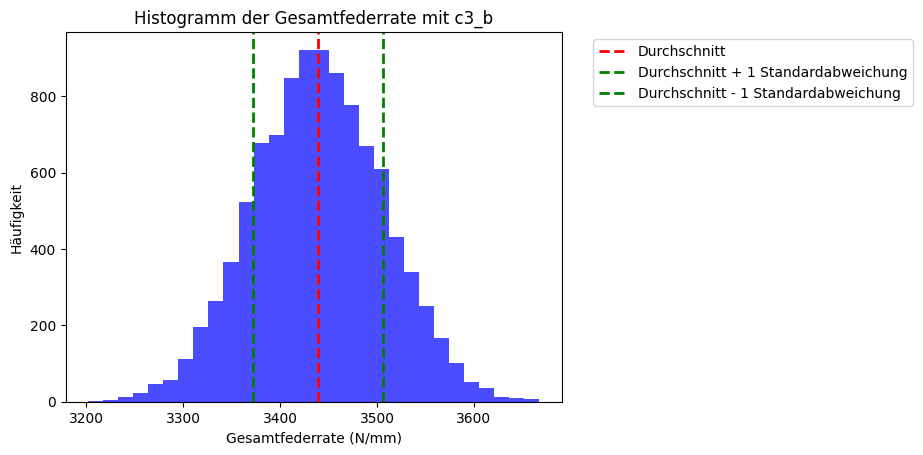

Durchschnittliche Federrate: 3439.38 N/mm
Varianz: 4499.78 (N/mm)²
Standardabweichung: 67.08 N/mm


In [1]:
import numpy as np
import matplotlib.pyplot as plt


N = 10000  # Anzahl Federspeicher
P = 8       # Anzahl Federn Pro Paket
i = 2.6     # Übersetzungsrate

def simulate_individual_springs(N, P, use_c3_b=False):
    c1_values = np.random.uniform(low=80, high=120, size=(N, P))
    c2_values = np.random.uniform(low=120, high=180, size=(N, P))

    if use_c3_b:
        c3_values = np.random.uniform(low=160, high=200, size=(N, P))
    else:
        c3_values = np.random.uniform(low=160, high=240, size=(N, P))

    return c1_values, c2_values, c3_values

def calculate_total_spring_rate(N, P, use_c3_b=False):
    c1_values, c2_values, c3_values = simulate_individual_springs(N, P)

    if use_c3_b:
        c3_b_values = simulate_individual_springs(N, P, True)[2]
        c_gesamt = np.sum(c1_values, axis=1) + np.sum(c2_values, axis=1) + np.sum(c3_b_values, axis=1)
    else:
        c_gesamt = np.sum(c1_values, axis=1) + np.sum(c2_values, axis=1) + np.sum(c3_values, axis=1)

    return c_gesamt

def plot_histogram_and_statistics(data, title):
    plt.hist(data, bins=30, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Gesamtfederrate (N/mm)')
    plt.ylabel('Häufigkeit')

    # Berechne Standardabweichung und zeichne sie als vertikale Linie ein
    std_dev = np.std(data)
    plt.axvline(x=np.mean(data), color='red', linestyle='dashed', linewidth=2, label='Durchschnitt')
    plt.axvline(x=np.mean(data) + std_dev, color='green', linestyle='dashed', linewidth=2, label='Durchschnitt + 1 Standardabweichung')
    plt.axvline(x=np.mean(data) - std_dev, color='green', linestyle='dashed', linewidth=2, label='Durchschnitt - 1 Standardabweichung')

      # Legende außerhalb des Diagramms platzieren
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    print(f"Durchschnittliche Federrate: {round(np.mean(data), 2)} N/mm")
    print(f"Varianz: {round(np.var(data), 2)} (N/mm)²")
    print(f"Standardabweichung: {round(std_dev, 2)} N/mm")


# Simulation und Analyse ohne c3_b Federn
c_gesamt_c3 = calculate_total_spring_rate(N, P, use_c3_b=False)
plot_histogram_and_statistics(c_gesamt_c3, 'Histogramm der Gesamtfederrate mit c3')


# Simulation und Analyse mit c3_b Federn
c_gesamt_c3b = calculate_total_spring_rate(N, P, use_c3_b=True)
plot_histogram_and_statistics(c_gesamt_c3b, 'Histogramm der Gesamtfederrate mit c3_b')


Bei der Analyse  des Federspeicherzylinders für Aufgabe 2 müssen zusätzlich Toleranzen der geometrischen Größen betrachtet werden, deren Abweichungen einfluss auf die Zylinderfläche haben und somit auf die Kraft (F=p*A)

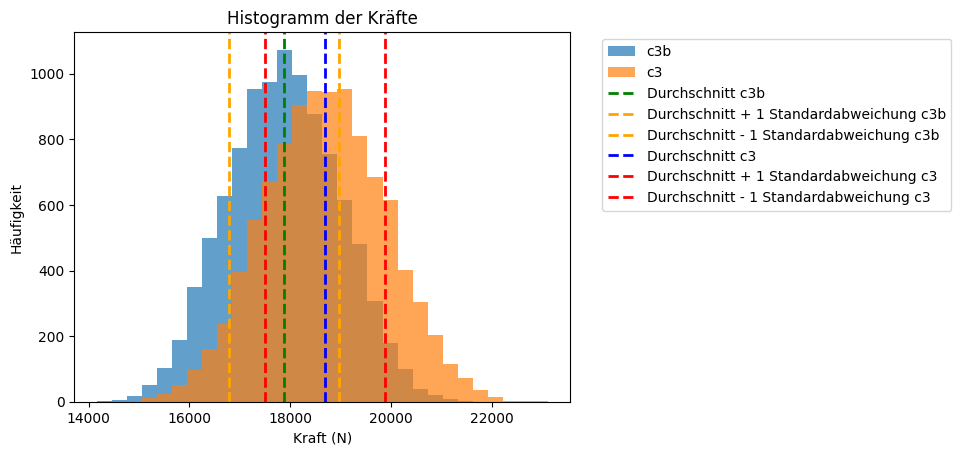

Statistiken für c3:
Durchschnittliche Kraft: 18690.19 N
Varianz: 1408762.33 N²
Standardabweichung: 1186.91 N


Statistiken für c3b:
Durchschnittliche Kraft: 17866.53 N
Varianz: 1194075.61 N²
Standardabweichung: 1092.74 N




In [12]:
import numpy as np
import matplotlib.pyplot as plt



N = 10000  # Anzahl Federspeicher
P = 8       # Anzahl Federn Pro Paket
i = 2.6     # Übersetzungsrate

rng = np.random.default_rng()  # Zufallszahlengenerator erstellen

def simulate_forces(N, c_gesamt, c_gesamt_c3b):
    d = rng.uniform(low=-0.05, high=0.05, size=N)
    h1 = rng.uniform(low=-0.05, high=0.05, size=N)
    h2 = rng.uniform(low=-0.05, high=0.05, size=N)
    l = rng.uniform(low=-0.05, high=0.05, size=N)

    Fa_c3 = c_gesamt * 2 * i * (1 + d + h1 + h2 + l)
    Fa_c3b = c_gesamt_c3b * 2 * i * (1 + d + h1 + h2 + l)

    return Fa_c3, Fa_c3b

def plot_forces_histogram(Fa_c3, Fa_c3b):
    max_force = max(np.max(Fa_c3), np.max(Fa_c3b))
    min_force = min(np.min(Fa_c3), np.min(Fa_c3b))

    plt.hist(Fa_c3b, bins=30, alpha=0.7, label='c3b', range=(min_force, max_force))
    plt.hist(Fa_c3, bins=30, alpha=0.7, label='c3', range=(min_force, max_force))

    avg_Fa_c3b = np.mean(Fa_c3b)
    std_Fa_c3b = np.std(Fa_c3b)
    plt.axvline(x=avg_Fa_c3b, color='green', linestyle='dashed', linewidth=2, label='Durchschnitt c3b')
    plt.axvline(x=avg_Fa_c3b + std_Fa_c3b, color='orange', linestyle='dashed', linewidth=2, label='Durchschnitt + 1 Standardabweichung c3b')
    plt.axvline(x=avg_Fa_c3b - std_Fa_c3b, color='orange', linestyle='dashed', linewidth=2, label='Durchschnitt - 1 Standardabweichung c3b')

    avg_Fa_c3 = np.mean(Fa_c3)
    std_Fa_c3 = np.std(Fa_c3)
    plt.axvline(x=avg_Fa_c3, color='blue', linestyle='dashed', linewidth=2, label='Durchschnitt c3')
    plt.axvline(x=avg_Fa_c3 + std_Fa_c3, color='red', linestyle='dashed', linewidth=2, label='Durchschnitt + 1 Standardabweichung c3')
    plt.axvline(x=avg_Fa_c3 - std_Fa_c3, color='red', linestyle='dashed', linewidth=2, label='Durchschnitt - 1 Standardabweichung c3')

    plt.title('Histogramm der Kräfte')
    plt.xlabel('Kraft (N)')
    plt.ylabel('Häufigkeit')
    
    # Legende außerhalb des Diagramms platzieren
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()



def print_statistics(Fa, label):
    avg_Fa = np.mean(Fa)
    var_Fa = np.var(Fa)
    std_Fa = np.std(Fa)

    print(f"Statistiken für {label}:")
    print(f"Durchschnittliche Kraft: {round(avg_Fa, 2)} N")
    print(f"Varianz: {round(var_Fa, 2)} N²")
    print(f"Standardabweichung: {round(std_Fa, 2)} N")
    print("\n")

# Simulation der Kräfte für c3 und c3b
Fa_c3, Fa_c3b = simulate_forces(N, c_gesamt_c3, c_gesamt_c3b)

# Histogramme und Statistiken
plot_forces_histogram(Fa_c3, Fa_c3b)
print_statistics(Fa_c3, 'c3')
print_statistics(Fa_c3b, 'c3b')


# Ergebnis

## Aufgabe 1

Zu a) Der Mittelwert der Gesamtfederrate liegt bei 3600 N/mm 
Zu b) Der Mittelwert der Gesamtfederrate liegt bei 3440 N/mm

Deutlich erkennbar ist, dass durch eine Eingrenzung der oberen Toleranzgrenze für die Feder c3 wie zu erwarten eine Abnahme der mittleren Gesamtfederrate von ca 4,5 Prozent stattfindet. Währendessen verringert sich die Standartabweichung um ca 24,5 Prozent, wodurch die Varianz der Gesamtfederraten stark eingedämpft wird.

## Aufgabe 2



Die Federspeichersysteme verhalten sich analog zur Federsteifigkeit. Durch die Verkleinerung des Toleranzbereiches verschiebt sich das Histogramm und auch somit die mittlere Federkraft der Federpakete auf ein niedrigeres Niveau. Die Federn c3b, mit einem verkleinerten oberen Toleranzbereich liegen bei einer mittleren Federkraft von ca. 17,9 kN und die "regulären" Federn bei einem Mittelwert von 18,7 kN.
Somit führt eine Einschränkung des oberen Toleranzbereiches zu einer Verkleinerung der Anzahl an konformen Einheiten und sollte vermieden werden.